In [34]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [5]:
def bin_sfr(t, sfr, bin_width=0.01):
    bin_left = 0.0
    bin_right = bin_left + bin_width
    
    ave_sfr = []
    ave_t = []
    
    max_val = np.max(t)
    while bin_left < max_val:
        key = np.logical_and(t >=bin_left, t<bin_right)
        ave_sfr.append(np.mean(sfr[key]))
        ave_t.append(np.mean(t[key]))
        
        bin_left += bin_width
        bin_right += bin_width
        
    return np.array(ave_t), np.array(ave_sfr)
    

(0.0, 4.0)

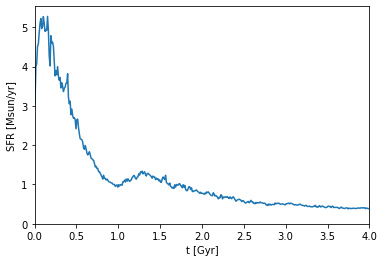

In [7]:
sfh_file = np.genfromtxt(basepath+'runs/MWiso_fg0.5_Z0/lvl4/output/sfr.txt')
time, sfr = bin_sfr(sfh_file[:,0], sfh_file[:,2])
plt.plot(time, sfr)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
plt.ylim(0, None)
plt.xlim(0, 4)

In [8]:
sn = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output', 800, combineFiles=True)

In [28]:
center = np.array([sn.BoxSize, sn.BoxSize, sn.BoxSize])/2.0
min_pot = np.argmin(sn.part1.pot.value)
center = sn.part1.pos.value[min_pot]

pos = sn.part4.pos.value - center

form_time = sn.part4.GFM_StellarFormationTime

thick = form_time < 1
thin = np.logical_and(form_time > 2, form_time < 4)

key = np.where(thin)[0]

(array([1.39316239e+01, 9.62725546e-01, 9.97150997e-02, 4.74833808e-03,
        1.18708452e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 15 artists>)

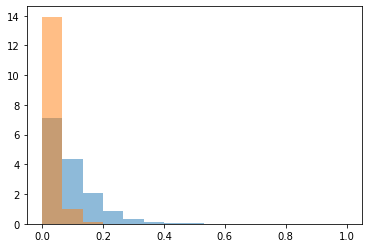

In [29]:
plt.hist(np.abs(pos[:,2][thick]), bins=np.linspace(0, 1, 16), alpha=0.5, density=True)
plt.hist(np.abs(pos[:,2][thin]), bins=np.linspace(0, 1, 16), alpha=0.5, density=True)

(array([4.73733777e+00, 1.43861982e+00, 2.35517569e-02, 4.90661602e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([0.        , 0.16129032, 0.32258065, 0.48387097, 0.64516129,
        0.80645161, 0.96774194, 1.12903226, 1.29032258, 1.4516129 ,
        1.61290323, 1.77419355, 1.93548387, 2.09677419, 2.25806452,
        2.41935484, 2.58064516, 2.74193548, 2.90322581, 3.06451613,
        3.22580645, 3.38709677, 3.5483871 , 3.70967742, 3.87096774,
        4.03225806, 4.19354839, 4.35483871, 4.51612903, 4.67741935,
        4.83870968, 5.        

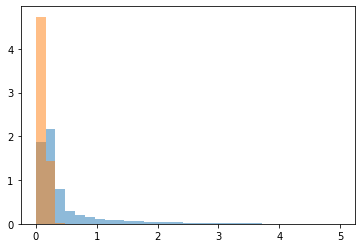

In [31]:
R = np.linalg.norm(pos[:,:2], axis=1)
plt.hist(R[thick], bins=np.linspace(0, 5, 32), alpha=0.5, density=True)
plt.hist(R[thin], bins=np.linspace(0, 5, 32), alpha=0.5, density=True)

In [44]:
SFR_list = []
fgas_list = []
time_list = []
Mgas_list = []
for i in tqdm(np.arange(0, 800, 10)):
    sn = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output', i, parttype=[0,4], fields=['Masses', 'StarFormationRate'], combineFiles=True)
    
    SFR = np.sum(sn.part0.sfr.value)
    Mstar = sn.MassTable[2].value*sn.NumPart_Total[2]
    if sn.NumPart_Total[4] > 0:
        Mstar += np.sum(sn.part4.mass.value)
    Mgas = np.sum(sn.part0.mass.value)
    
    fgas = Mgas / (Mgas + Mstar)
    
    SFR_list.append(SFR)
    fgas_list.append(fgas)
    Mgas_list.append(Mgas)
    time_list.append(sn.Time.value)
    
SFR_list = np.array(SFR_list)
fgas_list = np.array(fgas_list)
Mgas_list = np.array(Mgas_list)
time_list = np.array(time_list)
    

100%|██████████| 80/80 [01:34<00:00,  1.18s/it]


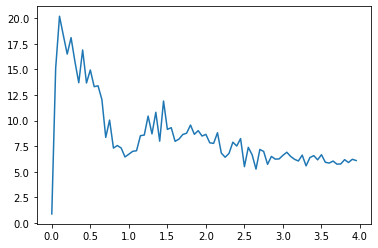

In [46]:
plt.plot(time_list, SFR_list/Mgas_list)